In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv("Data\Train.csv",
                parse_dates=["date"])
df.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


<AxesSubplot:>

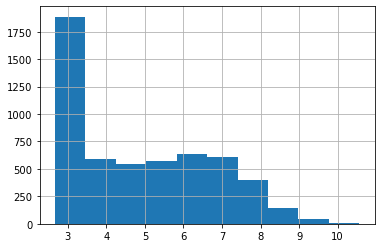

In [13]:
df["log_time_spent"] = np.log(df["time_spent"])
df["log_time_spent"].hist()

In [4]:
#df['sum_ac_pr_co']=df['added_in_cart']+df['purchased']+df['checked_out']

In [5]:
#df.head(2)

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent,log_time_spent,sum_ac_pr_co
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886,5.467579,1
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455,7.152625,1


In [14]:
df.device_details.unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [15]:
def grouping_device(data):
    print(f"data passed as ==> {data}")
    if "Desktop" in data:
        data = "desktop"
    elif "Phone" in data or "Tablet" in data or "iPad" in data or "Mobile" in data:
        data = "phone"
    else:
        data = "other"
    print(f"data converted as ==> {data}")
    return data
    
df["device_details"] = df["device_details"].apply(lambda x: grouping_device(x))

data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> Desktop - IE
data converted as ==> desktop
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> Android Phone - Android
data converted as ==> phone
data passed as ==> Desktop - Firefox
data converted as ==> desktop
data passed as ==> Android Tablet - Web
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> Android Tablet - Web
data converted as ==> phone
data passed as ==> iPad - Web
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> Desktop - Chrome


data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPad - Web
data converted as ==> phone
data passed as ==> iPad - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPad - Web
data converted as ==> phone
data passed as ==> Desktop - Safari
data converted as ==> desktop
data passed as ==> Other - Other
data converted as ==> other
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> Desktop - IE
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> pho

data passed as ==> Desktop - Firefox
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - Firefox
data converted as ==> desktop
data passed as ==> iPad - Web
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPad - Web
data converted as ==> phone
data passed as ==> Android Phone - MobileWeb
data converted as ==> phone
data passed as ==> Desktop - Safari
data converted as ==> desktop
data passed as ==> Unknown - MobileWeb
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPad - Web
data converted as ==> 

data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Android Phone - Android
data converted as ==> phone
data passed as ==> Desktop - Firefox
data converted as ==> desktop
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> Desktop - Firefox
data converted as ==> desktop
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> iPad - iOS
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> Android Phone - Android
data converted as ==> phone
data passed as ==>

In [16]:
df["device_details"].unique()

array(['desktop', 'phone', 'other'], dtype=object)

In [17]:
def convert_Date_Obj(df):
    """
    Accecps a Data Frame and a date object and extracts its corresponding Year Month and Date
    """
    
    df["Year"] = df.date.dt.year
    df["Month"] = df.date.dt.month
    df["Date"] = df.date.dt.day
    df["Day_of_Year"] = df.date.dt.dayofyear
    df["Week_Of_Year"] = df.date.dt.weekofyear
    df["Quarter"] = df.date.dt.quarter
    df["Day_Of_Week"] = df.date.dt.dayofweek
    df.drop("date", axis=1, inplace=True)
    
    return df

In [18]:
df_new = convert_Date_Obj(df)
df_new.head(2)

<ipython-input-17-d1471cc7cbcb>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["Week_Of_Year"] = df.date.dt.weekofyear


,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,log_time_spent,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,desktop,1,0,0,236.886,5.467579,2020,1,22,22,4,1,2
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,phone,1,0,0,1277.455,7.152625,2020,2,27,58,9,1,3


In [19]:
df_new.sort_values(by=["session_number", "Day_Of_Week", "device_details", "purchased", "added_in_cart", "checked_out"], inplace=True, ascending=True)
df_new.head()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,time_spent,log_time_spent,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
20,b10bcde9e00a50b98dbbeb311574c8ab,11,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_2)...,desktop,0,0,0,20.786,3.034280,2019,7,15,196,29,3,0
798,774cf16855eceacd11d00ac7ab023f08,11,Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...,desktop,0,0,0,20.259,3.008599,2020,1,20,20,4,1,0
822,69192a737862dea9caa612ae87c9d95f,11,Mozilla/5.0 (Macintosh; Intel Mac OS X 10.9; r...,desktop,0,0,0,22.259,3.102746,2019,8,5,217,32,3,0
886,f2e46adc3d0b406e07494b2072d90f86,11,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,desktop,0,0,0,24.337,3.191998,2019,10,7,280,41,4,0
971,16c8fd24a698641edaedf151798acd15,11,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,desktop,0,0,0,20.377,3.014407,2019,9,23,266,39,3,0


In [21]:
# this is the dataset on which we will be training our models
df_trunc = df_new[["session_number", "Date", "Day_Of_Week", "device_details", "purchased", "added_in_cart", "checked_out", "log_time_spent"]]
df_trunc.head(8)

,session_number,Date,Day_Of_Week,device_details,purchased,added_in_cart,checked_out,log_time_spent
20,11,15,0,desktop,0,0,0,3.034280
798,11,20,0,desktop,0,0,0,3.008599
822,11,5,0,desktop,0,0,0,3.102746
886,11,7,0,desktop,0,0,0,3.191998
971,11,23,0,desktop,0,0,0,3.014407
1056,11,7,0,desktop,0,0,0,3.000670
1427,11,11,0,desktop,0,0,0,3.315494
1660,11,11,0,desktop,0,0,0,5.522005


In [22]:
def convert_string_to_categorical(df):
    """
    Accepts a Data Frame and converts the String to Pandas category
    """
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
    return df

In [23]:
# Converting String to categoricals
df_cat = convert_string_to_categorical(df_trunc)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5429 entries, 20 to 5103
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   session_number  5429 non-null   int64   
 1   Date            5429 non-null   int64   
 2   Day_Of_Week     5429 non-null   int64   
 3   device_details  5429 non-null   category
 4   purchased       5429 non-null   int64   
 5   added_in_cart   5429 non-null   int64   
 6   checked_out     5429 non-null   int64   
 7   log_time_spent  5429 non-null   float64 
dtypes: category(1), float64(1), int64(6)
memory usage: 344.7 KB


<ipython-input-22-7da198a541aa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = content.astype("category").cat.as_ordered()


In [24]:
def fill_numbers(df):
    """
    Receives a DataFrame and fills its missing String values with numbers
    """
    
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            # Converting the Categorical values to numbers. 
            # Generally NULL will be filled as -1, we want to change it to 0(ZERO)
            df[label] = pd.Categorical(content).codes+1
    return df

In [25]:
df_final = fill_numbers(df_cat)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5429 entries, 20 to 5103
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_number  5429 non-null   int64  
 1   Date            5429 non-null   int64  
 2   Day_Of_Week     5429 non-null   int64  
 3   device_details  5429 non-null   int8   
 4   purchased       5429 non-null   int64  
 5   added_in_cart   5429 non-null   int64  
 6   checked_out     5429 non-null   int64  
 7   log_time_spent  5429 non-null   float64
dtypes: float64(1), int64(6), int8(1)
memory usage: 344.6 KB


<ipython-input-24-5e6525e77c8d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[label] = pd.Categorical(content).codes+1


In [26]:
df_final.isna().sum()

session_number    0
Date              0
Day_Of_Week       0
device_details    0
purchased         0
added_in_cart     0
checked_out       0
log_time_spent    0
dtype: int64

In [27]:
X = df_final[["session_number", "Date", "Day_Of_Week", "device_details", "purchased", "added_in_cart", "checked_out"]]
y = df_final["log_time_spent"]
len(X), len(y)

(5429, 5429)

In [28]:
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

len(X_train), len(y_train), len(X_val), len(y_val)

(4343, 4343, 1086, 1086)

In [29]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

# Building RMSLE error function
def rmsle(y_test, y_preds):
    """
    Returns Root Mean Squared Log error
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    # predicting on the Test Data
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_val)
    
    # converting the Traget Logarithmic value to its corresponding Exponential value.
    train_preds_actual = np.exp(train_preds)
    valid_preds_actual = np.exp(valid_preds)
    y_train_actual = np.exp(y_train)
    y_val_actual = np.exp(y_val)
    
    scores = {"Log Training MAE": mean_absolute_error(y_train, train_preds),
             "Log Valid MAE": mean_absolute_error(y_val, valid_preds),
             "Log Training RMSLE": rmsle(y_train, train_preds),
             "Log Valid RMSLE": rmsle(y_val, valid_preds),
             "Log Training R2 Score": r2_score(y_train, train_preds),
             "Log Valid R2 Score": r2_score(y_val, valid_preds),
             
             "Actual Training MAE": mean_absolute_error(y_train_actual, train_preds_actual),
             "Actual Valid MAE": mean_absolute_error(y_val_actual, valid_preds_actual),
             "Actual Training RMSLE": rmsle(y_train_actual, train_preds_actual),
             "Actual Valid RMSLE": rmsle(y_val_actual, valid_preds_actual),
             "Actual Training R2 Score": r2_score(y_train_actual, train_preds_actual),
             "Actual Valid R2 Score": r2_score(y_val_actual, valid_preds_actual)}
             
    return scores   

## XGBoost...

In [30]:
import xgboost as xgb

In [31]:
xgr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6594975539639095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01634714303249965, max_delta_step=0, max_depth=9,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.42320618378477715, tree_method='exact',
             validate_parameters=1, verbosity=2)

In [34]:
xgr.fit(X_train, y_train)

[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=5
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 18 extra nodes, 0 pruned nodes, max_depth=6
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=7
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=7
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 30 extra nodes, 0 pruned nodes, max_depth=7
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 p

[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 276 extra nodes, 0 pruned nodes, max_depth=9
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 166 extra nodes, 0 pruned nodes, max_depth=9
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 256 extra nodes, 0 pruned nodes, max_depth=9
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=9
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 288 extra nodes, 0 pruned nodes, max_depth=9
[18:38:52] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 228 extra nod

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6594975539639095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01634714303249965, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.42320618378477715, tree_method='exact',
             validate_parameters=1, verbosity=2)

In [35]:
show_scores(xgr)

{'Log Training MAE': 1.0570990774299112,
 'Log Valid MAE': 1.1533926720845635,
 'Log Training RMSLE': 0.21606866992979323,
 'Log Valid RMSLE': 0.23462192383276728,
 'Log Training R2 Score': 0.4556549774438937,
 'Log Valid R2 Score': 0.35559481006625604,
 'Actual Training MAE': 530.5012691583144,
 'Actual Valid MAE': 573.8241522518321,
 'Actual Training RMSLE': 1.3024873443850307,
 'Actual Valid RMSLE': 1.4214417855372434,
 'Actual Training R2 Score': 0.03929666976198909,
 'Actual Valid R2 Score': -0.001429453093410693}

In [36]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

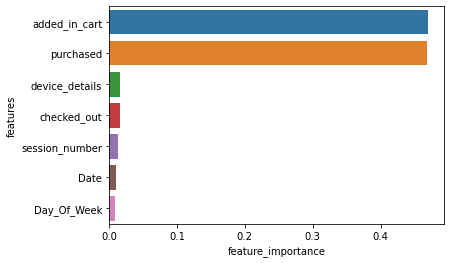

In [37]:
# XG Bosst feature importance
plot_features(X.columns, xgr.feature_importances_)

## Cat Boost..

In [55]:
from catboost import CatBoostRegressor

In [79]:
cbr_model_tuned = CatBoostRegressor(depth=6,
                                    iterations=100,
                                    learning_rate=0.09,
                                    early_stopping_rounds=500,
                                    random_state=42
                                   )

cbr_model_tuned.fit(X_train, y_train)

0:	learn: 1.7342703	total: 3.35ms	remaining: 331ms
1:	learn: 1.6931016	total: 5.27ms	remaining: 258ms
2:	learn: 1.6592434	total: 6.95ms	remaining: 225ms
3:	learn: 1.6295899	total: 7.97ms	remaining: 191ms
4:	learn: 1.6050739	total: 9.63ms	remaining: 183ms
5:	learn: 1.5834259	total: 11.2ms	remaining: 175ms
6:	learn: 1.5652471	total: 12.9ms	remaining: 171ms
7:	learn: 1.5487079	total: 14.5ms	remaining: 167ms
8:	learn: 1.5348136	total: 16ms	remaining: 162ms
9:	learn: 1.5236966	total: 17.7ms	remaining: 160ms
10:	learn: 1.5140729	total: 20.4ms	remaining: 165ms
11:	learn: 1.5059848	total: 21.9ms	remaining: 160ms
12:	learn: 1.4991658	total: 23.1ms	remaining: 154ms
13:	learn: 1.4929211	total: 24.6ms	remaining: 151ms
14:	learn: 1.4879879	total: 26.1ms	remaining: 148ms
15:	learn: 1.4832266	total: 27.7ms	remaining: 145ms
16:	learn: 1.4791849	total: 29.2ms	remaining: 142ms
17:	learn: 1.4762695	total: 30.3ms	remaining: 138ms
18:	learn: 1.4719303	total: 33.7ms	remaining: 144ms
19:	learn: 1.4689886	tot

In [80]:
show_scores(cbr_model_tuned)

{'Log Training MAE': 1.133486181687685,
 'Log Valid MAE': 1.1572092260686728,
 'Log Training RMSLE': 0.23257610982159382,
 'Log Valid RMSLE': 0.23675654892030945,
 'Log Training R2 Score': 0.3954146275862387,
 'Log Valid R2 Score': 0.3645368159478677,
 'Actual Training MAE': 524.1604611276259,
 'Actual Valid MAE': 562.2861834012825,
 'Actual Training RMSLE': 1.3714698125975817,
 'Actual Valid RMSLE': 1.4105511214505408,
 'Actual Training R2 Score': 0.08370333430456967,
 'Actual Valid R2 Score': 0.05362375510812423}

## Predictions on Test Data....................................

In [40]:
#converted the date to datetime instead of only being object
df_test = pd.read_csv("Data\Test.csv",
                parse_dates=["date"])
df_test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


In [41]:
df_test["device_details"] = df_test["device_details"].apply(lambda x: grouping_device(x))
df_test.head()

data passed as ==> Desktop - IE
data converted as ==> desktop
data passed as ==> Android Phone - Android
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - IE
data converted as ==> desktop
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Unknown - MobileWeb
data converted as ==> phone
data passed as ==> Desktop - IE
data converted as ==> desktop
data passed as ==> Android Tablet - Web
data converted as ==> phone
data passed as ==> Android Phone - Web
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> Android Phone - Android
data converted as ==> phone
data passed as ==> Android Phone - Android
data converted as ==> phone
data passed as 

data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> iPad - Web
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - Chrome
data converted as ==> desktop
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Android Tablet - Web
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> iPhone - iOS
data converted as ==> phone
data passed as ==> Desktop - IE
data converted as ==> desktop
data passed as ==> iPhone - Web
data converted as ==> phone
data passed as ==> iPhone - MobileWeb
data converted as ==> phone
data passed as ==> iPad - Web
data converted as ==> phone
data

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,desktop,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,phone,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,phone,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,desktop,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,desktop,2020-01-29,0,0,0


In [44]:
df_new = convert_Date_Obj(df_test)
df_new.head()

,session_id,session_number,client_agent,device_details,purchased,added_in_cart,checked_out,Year,Month,Date,Day_of_Year,Week_Of_Year,Quarter,Day_Of_Week
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,desktop,1,0,0,2020,1,7,7,2,1,1
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,phone,0,0,0,2020,2,13,44,7,1,3
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,phone,1,0,0,2019,10,14,287,42,4,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,desktop,0,0,0,2020,1,26,26,4,1,6
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,desktop,0,0,0,2020,1,29,29,5,1,2


In [45]:
df_cat = convert_string_to_categorical(df_new)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   session_id      2327 non-null   category
 1   session_number  2327 non-null   int64   
 2   client_agent    2268 non-null   category
 3   device_details  2327 non-null   category
 4   purchased       2327 non-null   int64   
 5   added_in_cart   2327 non-null   int64   
 6   checked_out     2327 non-null   int64   
 7   Year            2327 non-null   int64   
 8   Month           2327 non-null   int64   
 9   Date            2327 non-null   int64   
 10  Day_of_Year     2327 non-null   int64   
 11  Week_Of_Year    2327 non-null   int64   
 12  Quarter         2327 non-null   int64   
 13  Day_Of_Week     2327 non-null   int64   
dtypes: category(3), int64(11)
memory usage: 333.5 KB


In [46]:
df_final = fill_numbers(df_cat)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   session_id      2327 non-null   int16
 1   session_number  2327 non-null   int64
 2   client_agent    2327 non-null   int16
 3   device_details  2327 non-null   int8 
 4   purchased       2327 non-null   int64
 5   added_in_cart   2327 non-null   int64
 6   checked_out     2327 non-null   int64
 7   Year            2327 non-null   int64
 8   Month           2327 non-null   int64
 9   Date            2327 non-null   int64
 10  Day_of_Year     2327 non-null   int64
 11  Week_Of_Year    2327 non-null   int64
 12  Quarter         2327 non-null   int64
 13  Day_Of_Week     2327 non-null   int64
dtypes: int16(2), int64(11), int8(1)
memory usage: 211.5 KB


In [47]:
df_final.isna().sum()

session_id        0
session_number    0
client_agent      0
device_details    0
purchased         0
added_in_cart     0
checked_out       0
Year              0
Month             0
Date              0
Day_of_Year       0
Week_Of_Year      0
Quarter           0
Day_Of_Week       0
dtype: int64

In [48]:
X_test = df_final[["session_number", "Date", "Day_Of_Week", "device_details", "purchased", "added_in_cart", "checked_out"]]
X_test.head()

,session_number,Date,Day_Of_Week,device_details,purchased,added_in_cart,checked_out
0,99,7,1,1,1,0,0
1,935,13,3,3,0,0,0
2,902,14,0,3,1,0,0
3,3223,26,6,1,0,0,0
4,231,29,2,1,0,0,0


### Predictions with XGBoost...

In [49]:
xgr.fit(X, y)

[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=5
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 34 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=2
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 28 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 24 extra nodes, 0 pruned nodes, max_depth=8
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 6 extra nodes, 0 pr

[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 378 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 334 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 92 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 354 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[19:13:37] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 448 extra node

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6594975539639095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01634714303249965, max_delta_step=0, max_depth=9,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.42320618378477715, tree_method='exact',
             validate_parameters=1, verbosity=2)

In [50]:
show_scores(xgr)

{'Log Training MAE': 1.077296452271107,
 'Log Valid MAE': 1.0578870657219708,
 'Log Training RMSLE': 0.22001919613722803,
 'Log Valid RMSLE': 0.21524365111382837,
 'Log Training R2 Score': 0.4354600405178588,
 'Log Valid R2 Score': 0.45548817076319137,
 'Actual Training MAE': 534.5585216096918,
 'Actual Valid MAE': 550.4692471109886,
 'Actual Training RMSLE': 1.3264565550283347,
 'Actual Valid RMSLE': 1.306639974868327,
 'Actual Training R2 Score': 0.035167399851857906,
 'Actual Valid R2 Score': 0.03454233913094462}

In [51]:
xgr_pred = xgr.predict(X_test)
xgr_pred[:10]

array([5.9189887, 3.8898525, 5.84765  , 4.401738 , 4.7831917, 6.9995294,
       5.7994604, 4.479695 , 4.413368 , 6.0124216], dtype=float32)

In [52]:
xgb_df = pd.DataFrame()
xgb_df["time_spent"] = xgr_pred
xgb_df["time_spent"] = np.exp(xgb_df["time_spent"])
xgb_df.head()

,time_spent
0,372.035278
1,48.903675
2,346.419342
3,81.592567
4,119.485100


In [53]:
xgb_df.to_csv("Predictions\predictions_xg_boost_last.csv",
                index=False)

### Predictions with CatBoost...

#### Training on the whole dataset...

In [63]:
cbr_model_tuned.fit(X, y)

0:	learn: 1.7298115	total: 2.52ms	remaining: 249ms
1:	learn: 1.6842615	total: 5.39ms	remaining: 264ms
2:	learn: 1.6474358	total: 7.86ms	remaining: 254ms
3:	learn: 1.6167073	total: 9.51ms	remaining: 228ms
4:	learn: 1.5913316	total: 11.9ms	remaining: 227ms
5:	learn: 1.5685111	total: 14ms	remaining: 220ms
6:	learn: 1.5505419	total: 16.1ms	remaining: 214ms
7:	learn: 1.5345871	total: 18.1ms	remaining: 208ms
8:	learn: 1.5209234	total: 20ms	remaining: 202ms
9:	learn: 1.5103645	total: 21.8ms	remaining: 196ms
10:	learn: 1.5007872	total: 23.5ms	remaining: 190ms
11:	learn: 1.4935228	total: 24.8ms	remaining: 182ms
12:	learn: 1.4875708	total: 26.1ms	remaining: 175ms
13:	learn: 1.4819308	total: 27.8ms	remaining: 171ms
14:	learn: 1.4778211	total: 29.6ms	remaining: 168ms
15:	learn: 1.4732450	total: 31.4ms	remaining: 165ms
16:	learn: 1.4679678	total: 33.1ms	remaining: 162ms
17:	learn: 1.4639075	total: 35ms	remaining: 159ms
18:	learn: 1.4601800	total: 36.9ms	remaining: 157ms
19:	learn: 1.4579783	total: 

In [64]:
show_scores(cbr_model_tuned)

{'Log Training MAE': 1.130616368680526,
 'Log Valid MAE': 1.1092525931356814,
 'Log Training RMSLE': 0.23232972606835475,
 'Log Valid RMSLE': 0.22797440430004373,
 'Log Training R2 Score': 0.39648254634955593,
 'Log Valid R2 Score': 0.4139827021585678,
 'Actual Training MAE': 526.885560148758,
 'Actual Valid MAE': 542.5617707821319,
 'Actual Training RMSLE': 1.370286521723501,
 'Actual Valid RMSLE': 1.354388674679058,
 'Actual Training R2 Score': 0.08716053570356896,
 'Actual Valid R2 Score': 0.08207835917816964}

In [65]:
X_test

,session_number,Date,Day_Of_Week,device_details,purchased,added_in_cart,checked_out
0,99,7,1,1,1,0,0
1,935,13,3,3,0,0,0
2,902,14,0,3,1,0,0
3,3223,26,6,1,0,0,0
4,231,29,2,1,0,0,0
...,...,...,...,...,...,...,...
2322,1375,6,2,2,0,0,0
2323,1617,18,5,1,0,1,0
2324,4433,14,1,3,0,0,0
2325,297,1,1,3,1,0,0


In [66]:
cbr_pred = cbr_model_tuned.predict(X_test)
cbr_pred[:10]

array([6.33466327, 4.00163111, 6.2710346 , 4.76559048, 4.74870978,
       7.30414469, 5.98788694, 4.46650761, 4.69975606, 6.32771065])

In [67]:
cbr_pred_df = pd.DataFrame()
cbr_pred_df["time_spent"] = cbr_pred
cbr_pred_df["time_spent"] = np.exp(cbr_pred_df["time_spent"])
cbr_pred_df.head()

,time_spent
0,563.779530
1,54.687278
2,529.024424
3,117.400420
4,115.435251


In [68]:
cbr_pred_df.to_csv("Predictions\pred_cat_boost_last.csv", index=False)

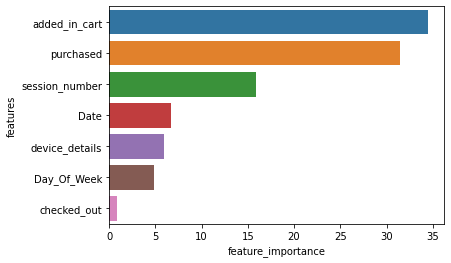

In [69]:
plot_features(X.columns, cbr_model_tuned.get_feature_importance())

In [81]:
X_train

,session_number,Date,Day_Of_Week,device_details,purchased,added_in_cart,checked_out
2162,924,13,1,3,0,0,0
1510,495,28,5,1,0,1,0
4430,33,30,0,3,1,0,0
3075,1375,1,6,3,0,0,0
1233,484,5,3,3,0,0,0
...,...,...,...,...,...,...,...
1831,1100,4,0,3,0,0,0
1111,4389,12,3,3,0,0,0
78,4598,13,4,3,0,1,0
1727,7172,9,2,3,0,0,0


>Lasso -1.306 (0.031)
>catboost -1.172 (0.030)
>RandForest -1.176 (0.030)
>stacking -1.173 (0.035)


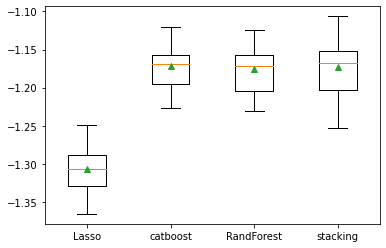

In [86]:
# compare ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor as xgb
from sklearn.linear_model import Lasso as lso

from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
 

 
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Lasso', lso(alpha=0.1)))
    
    level0.append(('catboost', CatBoostRegressor(depth=5,
                                    iterations=140,
                                    learning_rate=0.09,
                                    early_stopping_rounds=500,
                                    random_state=42)))
    
    level0.append(('RandForest', RandomForestRegressor(n_estimators=370,
                                                       min_samples_split=19,
                                                       min_samples_leaf=1,
                                                       max_features='sqrt',
                                                       max_depth=10,
                                                       n_jobs=-1,
                                                       bootstrap=True,
                                                       random_state=42)))
    # define meta learner model
    level1 = xgb(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6594975539639095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01634714303249965, max_delta_step=0, max_depth=9,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.42320618378477715, tree_method='exact',
             validate_parameters=1, verbosity=2)
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['Lasso'] = lso(alpha=0.1)
    
    models['catboost'] = CatBoostRegressor(depth=5,
                                    iterations=140,
                                    learning_rate=0.09,
                                    early_stopping_rounds=500,
                                    random_state=42)
    
    models['RandForest'] = RandomForestRegressor(n_estimators=370,
                                                       min_samples_split=19,
                                                       min_samples_leaf=1,
                                                       max_features='sqrt',
                                                       max_depth=10,
                                                       n_jobs=-1,
                                                       bootstrap=True,
                                                       random_state=42)
    models['stacking'] = get_stacking()
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
# X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [88]:
level0 = list()
level0.append(('catboost', CatBoostRegressor(depth=5,
                                    iterations=140,
                                    learning_rate=0.09,
                                    early_stopping_rounds=500,
                                    random_state=42)))
    
level0.append(('Lasso', lso(alpha=0.1)))
    
level0.append(('RandForest', RandomForestRegressor(n_estimators=370,
                                                       min_samples_split=19,
                                                       min_samples_leaf=1,
                                                       max_features='sqrt',
                                                       max_depth=10,
                                                       n_jobs=-1,
                                                       bootstrap=True,
                                                       random_state=42)))
# define meta learner model
level1 = xgb(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6594975539639095, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01634714303249965, max_delta_step=0, max_depth=9,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=200, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.42320618378477715, tree_method='exact',
             validate_parameters=1, verbosity=2)

# define the stacking ensemble
stk_model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
stk_model.fit(X, y)

0:	learn: 1.7349155	total: 5.58ms	remaining: 775ms
1:	learn: 1.6928020	total: 8.71ms	remaining: 601ms
2:	learn: 1.6588916	total: 11.9ms	remaining: 541ms
3:	learn: 1.6294808	total: 15.1ms	remaining: 512ms
4:	learn: 1.6041982	total: 18.5ms	remaining: 499ms
5:	learn: 1.5831354	total: 21.6ms	remaining: 483ms
6:	learn: 1.5650740	total: 25.5ms	remaining: 485ms
7:	learn: 1.5498893	total: 28.9ms	remaining: 477ms
8:	learn: 1.5361854	total: 32ms	remaining: 466ms
9:	learn: 1.5241967	total: 35.3ms	remaining: 459ms
10:	learn: 1.5152471	total: 37.5ms	remaining: 440ms
11:	learn: 1.5074056	total: 40.2ms	remaining: 429ms
12:	learn: 1.5002166	total: 43.3ms	remaining: 423ms
13:	learn: 1.4945226	total: 47.3ms	remaining: 426ms
14:	learn: 1.4898254	total: 50.8ms	remaining: 424ms
15:	learn: 1.4851430	total: 54.9ms	remaining: 425ms
16:	learn: 1.4820514	total: 59ms	remaining: 427ms
17:	learn: 1.4778720	total: 62.6ms	remaining: 425ms
18:	learn: 1.4741453	total: 66.2ms	remaining: 421ms
19:	learn: 1.4694129	total

44:	learn: 1.4327311	total: 153ms	remaining: 323ms
45:	learn: 1.4321269	total: 157ms	remaining: 321ms
46:	learn: 1.4315748	total: 161ms	remaining: 318ms
47:	learn: 1.4309059	total: 165ms	remaining: 316ms
48:	learn: 1.4301953	total: 168ms	remaining: 312ms
49:	learn: 1.4292313	total: 174ms	remaining: 314ms
50:	learn: 1.4286839	total: 178ms	remaining: 311ms
51:	learn: 1.4275733	total: 181ms	remaining: 307ms
52:	learn: 1.4265065	total: 185ms	remaining: 303ms
53:	learn: 1.4259554	total: 188ms	remaining: 300ms
54:	learn: 1.4256590	total: 192ms	remaining: 297ms
55:	learn: 1.4249844	total: 196ms	remaining: 294ms
56:	learn: 1.4240868	total: 199ms	remaining: 290ms
57:	learn: 1.4236282	total: 205ms	remaining: 290ms
58:	learn: 1.4231681	total: 209ms	remaining: 287ms
59:	learn: 1.4222874	total: 212ms	remaining: 283ms
60:	learn: 1.4222267	total: 215ms	remaining: 278ms
61:	learn: 1.4201490	total: 219ms	remaining: 276ms
62:	learn: 1.4194361	total: 222ms	remaining: 272ms
63:	learn: 1.4189484	total: 226

95:	learn: 1.4084662	total: 318ms	remaining: 146ms
96:	learn: 1.4079326	total: 321ms	remaining: 142ms
97:	learn: 1.4069158	total: 323ms	remaining: 138ms
98:	learn: 1.4061565	total: 325ms	remaining: 135ms
99:	learn: 1.4055559	total: 328ms	remaining: 131ms
100:	learn: 1.4050149	total: 330ms	remaining: 127ms
101:	learn: 1.4045718	total: 332ms	remaining: 124ms
102:	learn: 1.4041223	total: 334ms	remaining: 120ms
103:	learn: 1.4038061	total: 336ms	remaining: 116ms
104:	learn: 1.4031409	total: 339ms	remaining: 113ms
105:	learn: 1.4024561	total: 341ms	remaining: 109ms
106:	learn: 1.4014969	total: 343ms	remaining: 106ms
107:	learn: 1.4011991	total: 346ms	remaining: 102ms
108:	learn: 1.4000476	total: 350ms	remaining: 99.5ms
109:	learn: 1.3993697	total: 353ms	remaining: 96.3ms
110:	learn: 1.3986403	total: 357ms	remaining: 93.3ms
111:	learn: 1.3981879	total: 360ms	remaining: 90.1ms
112:	learn: 1.3975004	total: 364ms	remaining: 86.9ms
113:	learn: 1.3964842	total: 368ms	remaining: 83.8ms
114:	learn:

8:	learn: 1.5572414	total: 30.5ms	remaining: 444ms
9:	learn: 1.5464215	total: 34.2ms	remaining: 445ms
10:	learn: 1.5374944	total: 36.8ms	remaining: 431ms
11:	learn: 1.5297087	total: 40.3ms	remaining: 429ms
12:	learn: 1.5223253	total: 43.7ms	remaining: 427ms
13:	learn: 1.5167440	total: 47.3ms	remaining: 425ms
14:	learn: 1.5120414	total: 50.9ms	remaining: 424ms
15:	learn: 1.5078324	total: 61.6ms	remaining: 477ms
16:	learn: 1.5044264	total: 64.9ms	remaining: 470ms
17:	learn: 1.4988530	total: 68.3ms	remaining: 463ms
18:	learn: 1.4960479	total: 71.7ms	remaining: 456ms
19:	learn: 1.4910945	total: 75.2ms	remaining: 451ms
20:	learn: 1.4871580	total: 78.6ms	remaining: 446ms
21:	learn: 1.4839787	total: 81.5ms	remaining: 437ms
22:	learn: 1.4808011	total: 84.4ms	remaining: 429ms
23:	learn: 1.4782049	total: 87ms	remaining: 421ms
24:	learn: 1.4760223	total: 89.8ms	remaining: 413ms
25:	learn: 1.4733993	total: 92.5ms	remaining: 405ms
26:	learn: 1.4713146	total: 95.4ms	remaining: 399ms
27:	learn: 1.469

62:	learn: 1.3541939	total: 157ms	remaining: 192ms
63:	learn: 1.3536239	total: 160ms	remaining: 190ms
64:	learn: 1.3534373	total: 162ms	remaining: 187ms
65:	learn: 1.3525646	total: 165ms	remaining: 185ms
66:	learn: 1.3522165	total: 167ms	remaining: 182ms
67:	learn: 1.3514291	total: 170ms	remaining: 180ms
68:	learn: 1.3510868	total: 173ms	remaining: 178ms
69:	learn: 1.3505847	total: 175ms	remaining: 175ms
70:	learn: 1.3502362	total: 177ms	remaining: 172ms
71:	learn: 1.3501671	total: 179ms	remaining: 169ms
72:	learn: 1.3493983	total: 181ms	remaining: 167ms
73:	learn: 1.3490071	total: 184ms	remaining: 164ms
74:	learn: 1.3487016	total: 186ms	remaining: 161ms
75:	learn: 1.3483133	total: 188ms	remaining: 159ms
76:	learn: 1.3476891	total: 191ms	remaining: 156ms
77:	learn: 1.3471435	total: 193ms	remaining: 154ms
78:	learn: 1.3465992	total: 195ms	remaining: 151ms
79:	learn: 1.3460478	total: 197ms	remaining: 148ms
80:	learn: 1.3453741	total: 200ms	remaining: 146ms
81:	learn: 1.3450856	total: 203

[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 76 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 52 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 74 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 42 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 

[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 216 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 160 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 238 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 204 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 240 extra nod

[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 128 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 262 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 266 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 242 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 226 extra nodes, 0 pruned nodes, max_depth=9
[23:31:36] INFO: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/tree/updater_prune.cc:101: tree pruning end, 144 extra nod

StackingRegressor(cv=5,
                  estimators=[('catboost',
                               <catboost.core.CatBoostRegressor object at 0x0000011AF9AAEA60>),
                              ('Lasso', Lasso(alpha=0.1)),
                              ('RandForest',
                               RandomForestRegressor(max_depth=10,
                                                     max_features='sqrt',
                                                     min_samples_split=19,
                                                     n_estimators=370,
                                                     n_jobs=-1,
                                                     random_state=42))],
                  final_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                               colsample_bylevel=...
                                               importance_type='gain',
                                               interaction_constraints='',
             

In [89]:
show_scores(stk_model)

{'Log Training MAE': 1.152148731449445,
 'Log Valid MAE': 1.1360560219333942,
 'Log Training RMSLE': 0.2377110177140622,
 'Log Valid RMSLE': 0.23510931652658518,
 'Log Training R2 Score': 0.3376794967484993,
 'Log Valid R2 Score': 0.34617823174787465,
 'Actual Training MAE': 548.6649437412839,
 'Actual Valid MAE': 567.0863421115068,
 'Actual Training RMSLE': 1.4370894210892087,
 'Actual Valid RMSLE': 1.4322124247936174,
 'Actual Training R2 Score': 0.004176274882099373,
 'Actual Valid R2 Score': 0.00993592216218575}

In [90]:
X_test

,session_number,Date,Day_Of_Week,device_details,purchased,added_in_cart,checked_out
0,99,7,1,1,1,0,0
1,935,13,3,3,0,0,0
2,902,14,0,3,1,0,0
3,3223,26,6,1,0,0,0
4,231,29,2,1,0,0,0
...,...,...,...,...,...,...,...
2322,1375,6,2,2,0,0,0
2323,1617,18,5,1,0,1,0
2324,4433,14,1,3,0,0,0
2325,297,1,1,3,1,0,0


In [91]:
stk_pred = stk_model.predict(X_test)
stk_pred[:10]

array([6.130258 , 4.0678763, 5.9993434, 4.2527595, 4.566254 , 6.809127 ,
       5.7456884, 3.9624257, 4.4017615, 5.9694657], dtype=float32)

In [92]:
stk_pred_df = pd.DataFrame()
stk_pred_df["time_spent"] = stk_pred
stk_pred_df["time_spent"] = np.exp(stk_pred_df["time_spent"])
stk_pred_df.head()

,time_spent
0,459.554749
1,58.432739
2,403.164001
3,70.299133
4,96.183144


In [93]:
stk_pred_df.to_csv("Predictions\stk_pred_last.csv", index=False)

In [97]:
!pip install fbprophet

  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'A:\ML\env\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Arnab Aline\\AppData\\Local\\Temp\\pip-install-vjxkgtzl\\fbprophet\\setup.py'"'"'; __file__='"'"'C:\\Users\\Arnab Aline\\AppData\\Local\\Temp\\pip-install-vjxkgtzl\\fbprophet\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Arnab Aline\AppData\Local\Temp\pip-wheel-8lfe0q9x'
       cwd: C:\Users\Arnab Aline\AppData\Local\Temp\pip-install-vjxkgtzl\fbprophet\
  Complete output (10 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbprophet
  creating build\lib\fbprophet\stan_model
  INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_f5236004a3fd5b8429270d00efcc0cf9 NOW.
  error: Microsoft Visual C++ 14.0 or gr

In [96]:
import fbprophet

ModuleNotFoundError: No module named 'fbprophet'